27/04/2021

In [2]:
from pynverse import inversefunc    # to get inverse function
inv = inversefunc((lambda x: x** 2))
inv(16)

array(4.)

In [3]:
from scipy.integrate import quad    # for integrating

In [6]:
import numpy as np
from numpy.linalg import norm

def fuzzy_distance(x_1, x_2, lambda_, ro_, L=None, R=None):
    cl_1, cr_1, l_1, r_1 = x_1
    cl_2, cr_2, l_2, r_2 = x_2
    if lambda_ is None:
        if L != None:
            L_inv = inversefunc(L)
            lambda_ = quad(L_inv, 0, 1)
        else:
            raise NameError('No information about L-side')
    if ro_ is None:
        if R != None:
            R_inv = inversefunc(R)
            ro_ = quad(R_inv, 0, 1)
        else:
            raise NameError('No information about R-side')
            
    return np.sqrt(
        norm(cl_1 - cl_2) ** 2 + norm(cr_1 - cr_2) ** 2 + \
        norm((cl_1 - lambda_ * l_1) - (cl_2 - lambda_ * l_2)) ** 2 +\
        norm((cr_1 - ro_ * r_1) - (cr_2 - ro_ * r_2)) ** 2
    )

In [5]:
x = np.random.normal(0,1,10)
y = np.random.normal(0,1,10)

array([-1.43685402, -0.8064303 ,  1.51192337,  0.01469104, -1.12447267,
        0.64721798,  0.07152012,  0.44883416, -1.33512064, -2.57017734])

In [7]:
x = (2, 5, 0.5, 0.5)
y = (1,3,0.2,0.6)
fuzzy_distance(x, y, 0.5, 0.5)

3.150396800404673

In [ ]:
x = ()

18/05/2021

$d(x_i,x_j) = \big(||m_{1,i}-m_{1,j}||^2 + ||m_{2,i}-m_{2,j}||^2 + ||(m_{1,i}-\lambda \ell_i) -(m_{1,j}-\lambda\ell_{j})||^2 + ||(m_{1,i}+\rho r_i) -(m_{1,j}+\rho r_{j})||^2\big)^{1/2}$

0. fuzzify (params: $\lambda, \rho (L, R), m, \Delta c)$
1. calculate distances
2. wishart on distances

In [3]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=1,n_samples=100, n_informative=1,n_redundant=0,n_repeated=0, n_clusters_per_class=1)

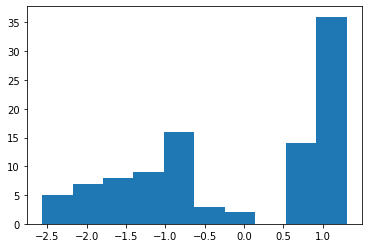

In [7]:
import matplotlib.pyplot as plt
plt.hist(X)
plt.show()

In [10]:
import numpy as np
np.std(X[y == 1])

0.13219593213298406

19/05/2021 FCM

In [93]:
?fuzz.cluster.cmeans

Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

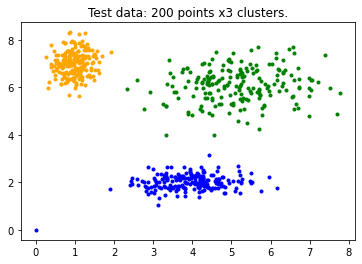

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

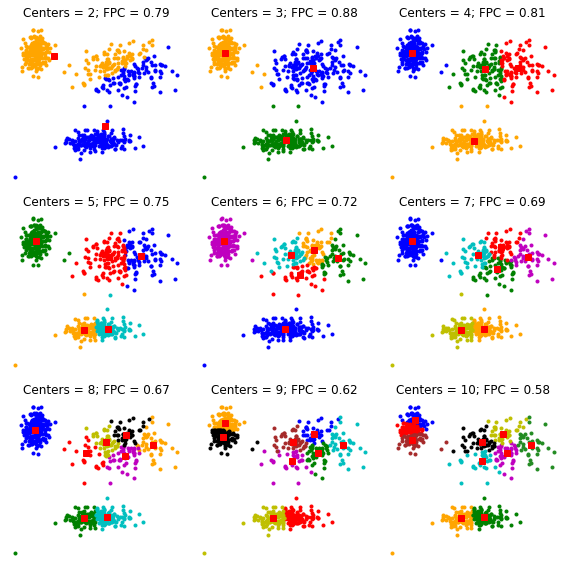

In [57]:
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

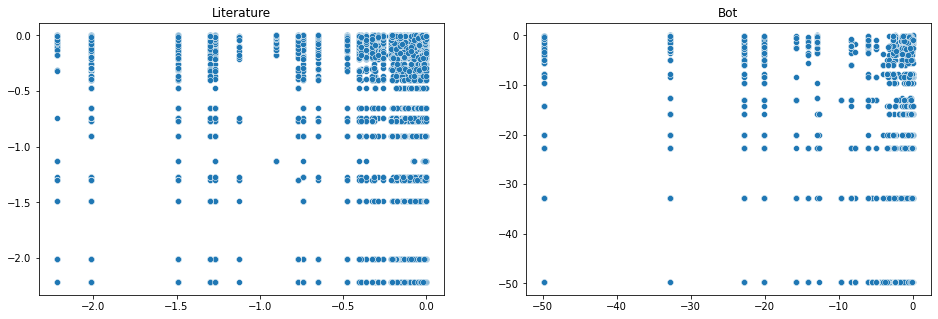

In [91]:
import tables
with tables.open_file('../ENG/embs/lit/the_sorrows_of_young_werther_en_boylan' + '/e%d_%d.h5' % (1, 2), mode='r') as f:
    X = (f.root.data[:,:])
with tables.open_file('../ENG/embs/bot/processed_lstm__anna_karenina' + '/e%d_%d.h5' % (1, 2), mode='r') as f:
    X_bot = (f.root.data[:,:])
import seaborn as sns
fig, axs = plt.subplots(1,2,figsize=(16,5))
sns.scatterplot(x=X[:,0], y=X[:,1], ax=axs[0])
axs[0].set_title('Literature')
sns.scatterplot(x=X_bot[:,0], y=X_bot[:,1], ax=axs[1])
axs[1].set_title('Bot')
plt.show()

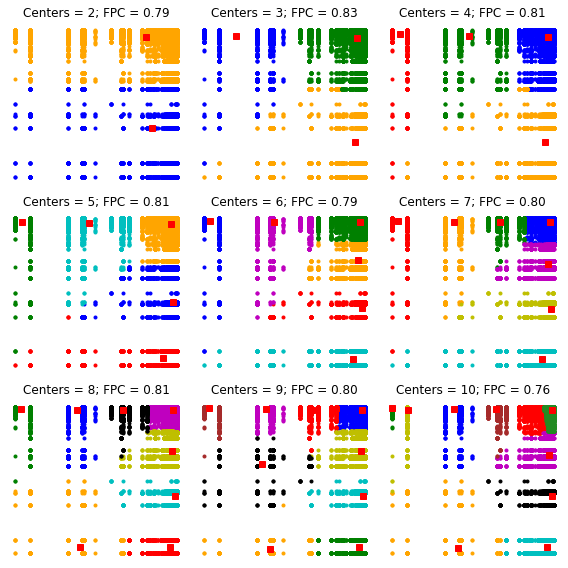

In [58]:
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
xpts, ypts = X[:,0], X[:,1]
alldata = X.T
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

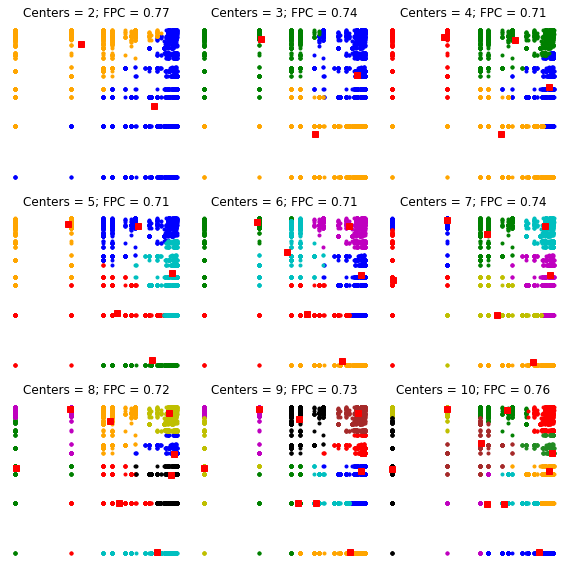

In [59]:
fig2, axes2 = plt.subplots(3, 3, figsize=(8, 8))
xpts, ypts = X_bot[:,0], X_bot[:,1]
alldata = X_bot.T
fpcs = []

for ncenters, ax in enumerate(axes2.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig2.tight_layout()

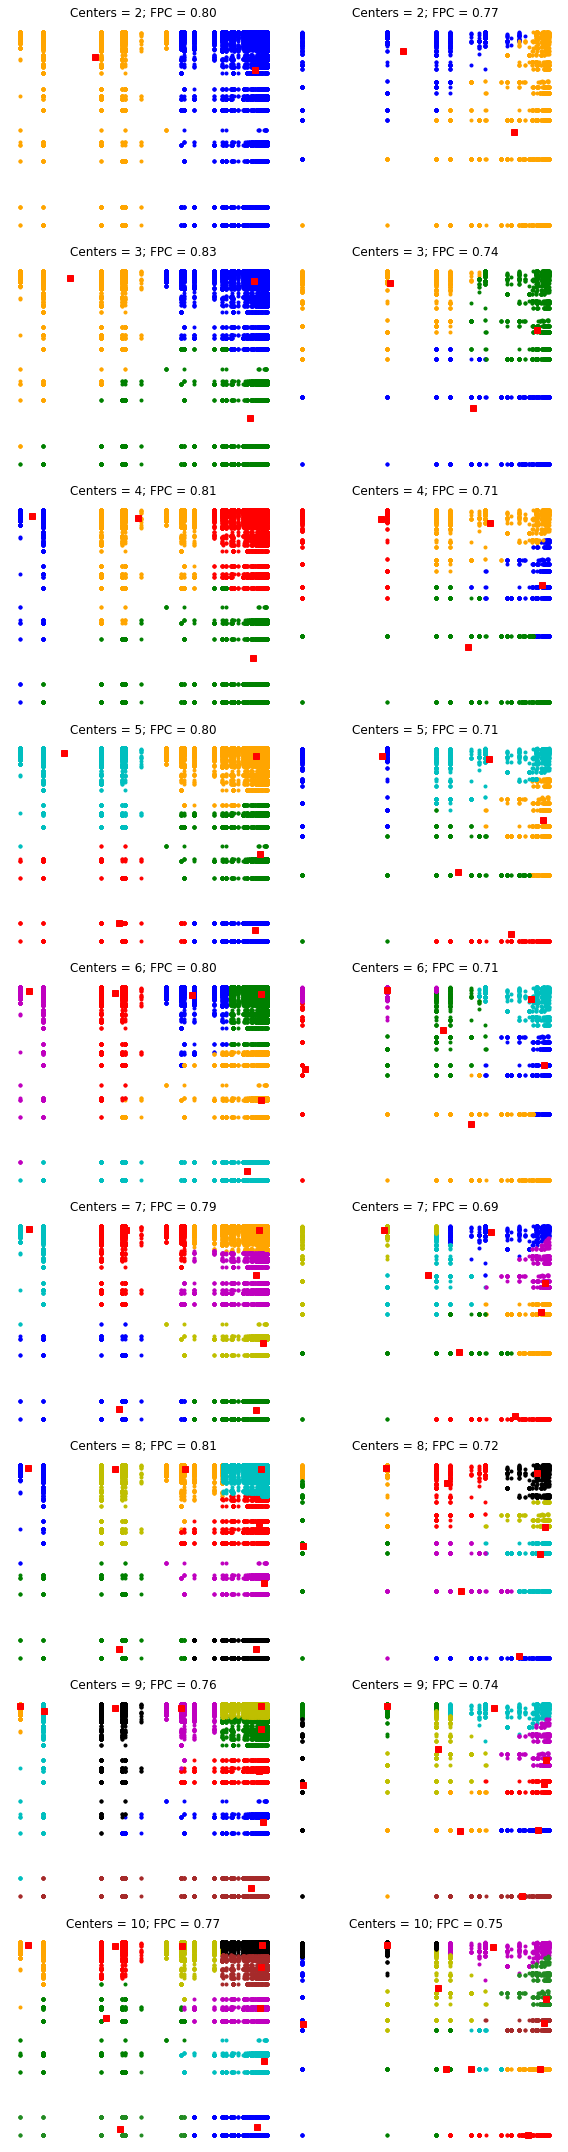

In [87]:
fig, axes = plt.subplots(9, 2, figsize=(8, 30))
xpts, ypts = X[:,0], X[:,1]
alldata = X.T
xpts_bot, ypts_bot = X_bot[:,0], X_bot[:,1]
alldata_bot = X_bot.T
fpcs = []
fpcs_bot = []

for ncenters, (ax, ax_) in enumerate(zip(axes[:,0], axes[:,1]), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

    cntr_, u_, u0_, d_, jm_, p_, fpc_ = fuzz.cluster.cmeans(
        alldata_bot, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs_bot.append(fpc_)

    # Plot assigned clusters, for each data point in training set
    cluster_membership_ = np.argmax(u_, axis=0)
    for j in range(ncenters):
        ax_.plot(xpts_bot[cluster_membership_ == j],
                ypts_bot[cluster_membership_ == j], '.', color=colors[j])
        
    # Mark the center of each fuzzy cluster
    for pt in cntr_:
        ax_.plot(pt[0], pt[1], 'rs')

    ax_.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc_))
    ax_.axis('off')

fig.tight_layout()

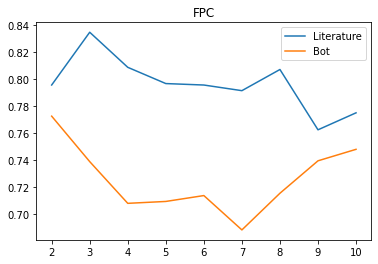

In [92]:
plt.title('FPC')
plt.plot(range(2,11), fpcs, label='Literature')
plt.plot(range(2,11), fpcs_bot, label='Bot')
plt.legend()
plt.show()

In [104]:
import pandas as pd
clusters = pd.DataFrame(u.T).describe()

clusters_bot = pd.DataFrame(u_.T).describe()

In [103]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [109]:
from tqdm.notebook import tqdm, trange

In [110]:
lit_data = []
bot_data = []
for ncenters in trange(2,11):
    lit_data.append(fuzz.cluster.cmeans(    # cntr, u, u0, d, jm, p, fpc
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None))
    bot_data.append(fuzz.cluster.cmeans(
        alldata_bot, ncenters, 2, error=0.005, maxiter=1000, init=None))

  0%|          | 0/9 [00:00<?, ?it/s]

In [122]:
for u, u_ in zip([x[1] for x in lit_data], [x[1] for x in bot_data]):
    clusters = pd.DataFrame(u.T).describe()
    clusters_bot = pd.DataFrame(u_.T).describe()
    display_side_by_side(clusters, clusters_bot)

,0,1
count,34703.000000,34703.000000
mean,0.690534,0.309466
std,0.333914,0.333914
min,0.001251,0.000578
25%,0.522458,0.069636
50%,0.871724,0.128276
75%,0.930364,0.477542
max,0.999422,0.998749
,0,1
count,8626.000000,8626.000000


,0,1,2
count,34703.000000,34703.000000,34703.000000
mean,0.561821,0.213849,0.224330
std,0.425315,0.346028,0.349907
min,0.016011,0.000027,0.000030
25%,0.066064,0.006724,0.007378
50%,0.659296,0.026411,0.027249
75%,0.985807,0.251548,0.280871
max,0.999944,0.974426,0.970521
,0,1,2
count,8626.000000,8626.000000,8626.000000


,0,1,2,3
count,34703.000000,34703.000000,34703.000000,34703.000000
mean,0.519335,0.195268,0.113474,0.171922
std,0.435907,0.337901,0.259205,0.293987
min,0.001152,0.000005,0.000004,0.000011
25%,0.036284,0.003672,0.003408,0.009473
50%,0.570816,0.007497,0.015514,0.026754
75%,0.981665,0.179149,0.058974,0.131953
max,0.999981,0.974028,0.985410,0.996195
,0,1,2,3
count,8626.000000,8626.000000,8626.000000,8626.000000


,0,1,2,3,4
count,3.470300e+04,34703.000000,34703.000000,3.470300e+04,34703.000000
mean,1.183927e-01,0.139225,0.482622,1.037436e-01,0.156016
std,2.868022e-01,0.276650,0.446681,2.583793e-01,0.296844
min,5.922663e-07,0.000002,0.000008,6.038499e-07,0.000002
25%,1.910158e-03,0.005730,0.009637,1.731909e-03,0.004307
50%,6.406971e-03,0.011828,0.321911,4.059745e-03,0.015117
75%,3.595329e-02,0.074511,0.980790,2.850653e-02,0.078819
max,9.859088e-01,0.988916,0.999995,9.812284e-01,0.999969
,0,1,2,3,4
count,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000


,0,1,2,3,4,5
count,34703.000000,34703.000000,34703.000000,34703.000000,34703.000000,34703.000000
mean,0.112523,0.111183,0.125807,0.093384,0.126243,0.430860
std,0.285790,0.218027,0.283570,0.252512,0.272913,0.438940
min,0.000004,0.000044,0.000009,0.000004,0.000011,0.000123
25%,0.001329,0.008890,0.002514,0.001171,0.003374,0.007406
50%,0.003731,0.017206,0.011952,0.005167,0.008743,0.197688
75%,0.025631,0.097385,0.049690,0.017620,0.034093,0.972504
max,0.985540,0.998764,0.981457,0.978830,0.999443,0.999929
,0,1,2,3,4,5
count,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000


,0,1,2,3,4,5,6
count,34703.000000,34703.000000,3.470300e+04,3.470300e+04,34703.000000,3.470300e+04,3.470300e+04
mean,0.096834,0.088293,1.189097e-01,9.440133e-02,0.407090,1.044986e-01,8.997265e-02
std,0.254283,0.214762,2.822043e-01,2.157793e-01,0.441612,2.827292e-01,2.513309e-01
min,0.000002,0.000019,3.069352e-07,7.950328e-07,0.000001,3.457619e-07,1.468352e-07
25%,0.002407,0.005364,2.039603e-03,5.950727e-03,0.006915,1.022414e-03,9.197423e-04
50%,0.005549,0.009215,6.226753e-03,1.242374e-02,0.074570,3.070914e-03,2.617358e-03
75%,0.032448,0.044928,4.165676e-02,4.844763e-02,0.971755,1.480252e-02,1.316931e-02
max,0.972290,0.999995,9.750362e-01,9.867082e-01,0.999944,9.838318e-01,9.774219e-01
,0,1,2,3,4,5,6
count,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000


,0,1,2,3,4,5,6,7
count,3.470300e+04,3.470300e+04,3.470300e+04,3.470300e+04,3.470300e+04,34703.000000,3.470300e+04,3.470300e+04
mean,9.408710e-02,1.018852e-01,9.224890e-02,8.549733e-02,8.201597e-02,0.402113,1.139639e-01,2.818829e-02
std,2.544333e-01,2.822700e-01,2.150506e-01,2.145261e-01,2.467406e-01,0.441790,2.822053e-01,1.321995e-01
min,1.261096e-07,4.997918e-08,5.676988e-07,4.633966e-07,5.117373e-08,0.000057,1.285345e-07,3.695277e-08
25%,2.174484e-03,9.418851e-04,5.647197e-03,4.124552e-03,8.203566e-04,0.005124,1.855435e-03,7.387577e-04
50%,4.950355e-03,2.476106e-03,9.731704e-03,8.683758e-03,2.524204e-03,0.052428,5.492147e-03,2.738083e-03
75%,2.143654e-02,1.321469e-02,4.447663e-02,3.746128e-02,1.070064e-02,0.971614,3.345410e-02,7.716072e-03
max,9.730011e-01,9.838091e-01,9.969129e-01,9.998030e-01,9.696652e-01,0.999999,9.818965e-01,9.794463e-01
,0,1,2,3,4,5,6,7
count,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000


,0,1,2,3,4,5,6,7,8
count,3.470300e+04,3.470300e+04,34703.000000,34703.000000,3.470300e+04,3.470300e+04,34703.000000,3.470300e+04,34703.000000
mean,1.098521e-01,1.002132e-01,0.078136,0.330145,8.921901e-02,8.044407e-02,0.069953,2.708383e-02,0.114954
std,2.801360e-01,2.813065e-01,0.207776,0.405911,2.509947e-01,2.455864e-01,0.204336,1.311848e-01,0.209825
min,4.711022e-07,1.814252e-07,0.000002,0.000507,4.499400e-07,1.887574e-07,0.000001,1.348706e-07,0.000018
25%,1.216498e-03,5.930002e-04,0.003720,0.005179,1.323511e-03,6.533982e-04,0.003184,5.236061e-04,0.005406
50%,3.687616e-03,1.989865e-03,0.008205,0.044768,4.014175e-03,2.013516e-03,0.006249,1.716447e-03,0.022356
75%,2.656155e-02,7.919975e-03,0.027053,0.836875,1.825825e-02,1.028876e-02,0.028960,6.045984e-03,0.097152
max,9.766917e-01,9.827289e-01,0.997726,0.999977,9.628985e-01,9.677453e-01,0.993041,9.800513e-01,0.985265
,0,1,2,3,4,5,6,7,8
count,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000


,0,1,2,3,4,5,6,7,8,9
count,34703.000000,3.470300e+04,3.470300e+04,3.470300e+04,3.470300e+04,3.470300e+04,3.470300e+04,34703.000000,34703.000000,3.470300e+04
mean,0.325319,1.083421e-01,1.782789e-02,2.533145e-02,6.814065e-02,7.915114e-02,9.748266e-02,0.116202,0.076440,8.576365e-02
std,0.403800,2.790578e-01,7.722009e-02,1.279737e-01,2.030369e-01,2.440628e-01,2.780830e-01,0.211627,0.206624,2.468623e-01
min,0.000541,3.353785e-07,2.154610e-07,9.505859e-08,9.858669e-07,1.342507e-07,1.283731e-07,0.000014,0.000001,3.209837e-07
25%,0.005052,1.152671e-03,1.159205e-03,4.857856e-04,2.884256e-03,5.905993e-04,5.622050e-04,0.005273,0.003595,1.234593e-03
50%,0.033890,3.609573e-03,4.039288e-03,1.720549e-03,6.188886e-03,2.060085e-03,1.868580e-03,0.022706,0.008002,3.938822e-03
75%,0.822685,2.460271e-02,1.175294e-02,5.952704e-03,2.790533e-02,9.600191e-03,7.565138e-03,0.096794,0.026687,1.797064e-02
max,0.999982,9.753860e-01,9.816448e-01,9.856408e-01,9.958239e-01,9.654949e-01,9.806866e-01,0.996480,0.997432,9.616165e-01
,0,1,2,3,4,5,6,7,8,9
count,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8.626000e+03,8626.000000,8.626000e+03,8626.000000,8626.000000


*21/05/2021 Crisp clustering on fuzzy data*

Pipeline: $x_i \rightarrow \mu_i \rightarrow [\text{with parameters } \Delta c, L, R] \xrightarrow{*} \tilde{x_i} \rightarrow distances(\tilde{X}, \tilde{X}) \rightarrow Wishart$

*$ \mu_i \text{ for left or right slope }$

In [2]:
?make_classification

In [3]:
from sklearn.datasets import make_blobs
#X, y = make_classification(n_features=1, n_classes = 5,n_samples=100, n_informative=1,n_redundant=0,n_repeated=0, n_clusters_per_class=1)

In [19]:
?make_blobs

In [20]:
X, y, centers = make_blobs(n_features=1, centers=5, return_centers=True)

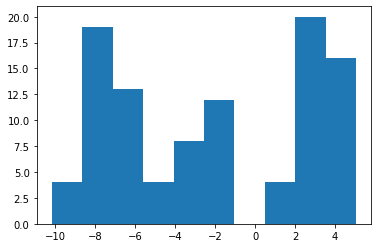

In [21]:
import matplotlib.pyplot as plt
plt.hist(X)
plt.show()

In [25]:
centers

array([[-6.93000596],
       [-7.52467733],
       [-2.78021148],
       [ 3.44041294],
       [ 2.93550184]])

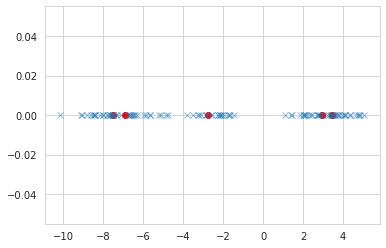

In [29]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
plt.plot(X, np.zeros_like(X), 'x',alpha=.5)
plt.scatter(centers, np.zeros_like(centers), c='r',alpha=1)

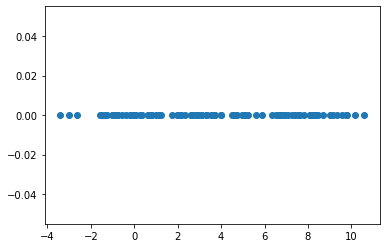

In [18]:
plt.scatter(X,np.zeros_like(X))

In [33]:
mus = np.random.uniform(0,1,X.shape).reshape(-1)

In [37]:
import pandas as pd
pd.DataFrame(X).describe()

,0
count,100.000000
mean,-2.105099
std,4.800056
min,-10.171401
25%,-6.647888
50%,-2.242030
75%,2.754484
max,5.058928


In [42]:
X[0], mus[0]

(array([-5.9690535]), array([0.81016266]))

In [10]:
def trapmf(xs,mus,dc=3,l=2, r=2):
    m1 = np.zeros(xs.shape)
    m2 = np.zeros(xs.shape)
    ps = np.random.binomial(n=1,size=xs.shape, p=0.5)    # probability for left/right slope
    for i, (p, x, mu) in enumerate(zip(ps, xs, mus)):
        for j, pj in enumerate(p):
            if pj == 1:
                m1[i][j] = l * (1 - mu[j]) + x[j]
                m2[i][j] = (m1[i][j] + dc)
            else:
                m2[i][j] = r * (mu[j] - 1) + x[j]
                m1[i][j] = (m2[i][j] - dc)
    return m1, m2, ps

In [11]:
X_2 = np.random.normal(0,1,(100,10))
print(X_2.shape)
mus_2 = np.random.uniform(0,1,X_2.shape)

trapmf(X_2, mus_2)

(100, 10)


(array([[-5.99595756e+00, -5.46928531e-01, -3.83283283e+00,
         -5.88696972e+00, -3.34086804e+00,  6.07825273e-01,
         -3.15225492e+00, -7.07831177e+00,  3.51410904e-01,
          1.66640431e+00],
        [ 1.94158049e+00, -1.94253367e+00, -4.20360291e+00,
         -4.09965944e+00, -2.68866876e-01, -4.12941312e+00,
         -2.22096512e+00, -2.52033178e-01, -1.37225515e+00,
         -4.63065815e+00],
        [-4.68744960e+00, -6.59694895e+00,  1.37017118e+00,
         -5.21462828e+00, -5.26202510e+00, -5.17858389e+00,
          2.00751780e+00, -6.84475880e-02,  8.09119571e-01,
         -5.07532170e-01],
        [ 4.01773497e+00,  1.17611399e+00, -4.94969170e+00,
         -4.84089362e+00,  1.93826699e+00,  4.07102645e-01,
         -4.80050614e+00, -6.47553280e+00, -3.11255913e+00,
          1.57247140e+00],
        [ 7.19970779e-02, -6.31182566e+00, -5.71839808e+00,
         -1.78180820e+00, -5.07043757e+00,  2.39891165e+00,
          1.31614979e-01,  8.45182328e-01, -4.125569

In [12]:
def draw_trapmf(m1, m2, axs, dc=3, l=2,r=2, x=None, mu=None):
    axs.plot([m1,m2], np.ones(2))
    axs.plot([m1-l,m1],[0,1])
    axs.plot([m2,m2+r], [1,0])
    axs.plot([x],[mu],'x')
    return axs

In [14]:
import random
import matplotlib.pyplot as plt
someidx = random.sample(range(X.shape[0]), 5)

fig, axs = plt.subplots(1,1)
for x, mu in zip(
    X[someidx].reshape(-1),
    mus[someidx]
):
    m1, m2, p = trapmf(np.array([[x]]),np.array([[mu]])) 
    draw_trapmf(m1.reshape(-1), m2.reshape(-1), axs, x=x, mu=mu)

In [15]:
import numpy as np
from numpy.linalg import norm

def fuzzy_distance(x_1, x_2, lambda_, ro_, L=None, R=None):
    cl_1, cr_1, l_1, r_1 = x_1
    cl_2, cr_2, l_2, r_2 = x_2
    if lambda_ is None:
        if L != None:
            L_inv = inversefunc(L)
            lambda_ = quad(L_inv, 0, 1)
        else:
            raise NameError('No information about L-side')
    if ro_ is None:
        if R != None:
            R_inv = inversefunc(R)
            ro_ = quad(R_inv, 0, 1)
        else:
            raise NameError('No information about R-side')
            
    return np.sqrt(
        norm(cl_1 - cl_2) ** 2 + norm(cr_1 - cr_2) ** 2 + \
        norm((cl_1 - lambda_ * l_1) - (cl_2 - lambda_ * l_2)) ** 2 +\
        norm((cr_1 - ro_ * r_1) - (cr_2 - ro_ * r_2)) ** 2
    )

23/05/2021 Solving

***Fuzzification***

In [ ]:
!pip install sympy

In [16]:
import numpy as np
from sympy.solvers import solve
from sympy import Symbol
x = Symbol('x')
solve(x**2 - 1, x)

[-1, 1]

In [63]:
from tqdm.notebook import tqdm, trange

In [17]:
def mu_func(mus, xs, ps=None, dc=3, l=2, r=2):
    m1 = np.zeros(xs.shape)
    m2 = np.zeros(xs.shape)
    if ps is None:
        ps = np.random.binomial(n=1,size=xs.shape, p=0.5)    # probability for left/right slope
    dim = xs.shape[1]
    for i, (x, mu, p) in tqdm(enumerate(zip(xs, mus, ps)), total=xs.shape[0]):
        symbols = []
        sols = []
        eq = 1
        for pj, xj in zip(p, x):
            m = Symbol('x')
            if pj == 1:
                sols.append(solve((1 - (m - xj) / l) - np.power(mu,1/dim), m)[0])
            else:
                sols.append(solve((1 - (xj - m) / r) - np.power(mu,1/dim), m)[0])
        for j in range(dim):
            if p[j] == 1:
                m1[i][j] = sols[j]
                m2[i][j] = m1[i][j] + dc
            else:
                m2[i][j] = sols[j]
                m1[i][j] = m2[i][j] - dc
    return m1, m2, ps

In [18]:
mu_func([0.5], np.array([[1,2]]), np.array([[1,0]]), 5, 2, 2)

  0%|          | 0/1 [00:00<?, ?it/s]

(array([[ 1.58578644, -3.58578644]]),
 array([[6.58578644, 1.41421356]]),
 array([[1, 0]]))

In [19]:
from sklearn.datasets import make_blobs
X, y, centers = make_blobs(n_features=2, centers=5, return_centers=True)

In [3]:
import numpy as np

In [4]:
mus = np.random.uniform(0,1,X.shape).reshape(-1)

In [8]:
from tqdm.notebook import tqdm, trange

In [20]:
m1, m2, p = mu_func(mus, X)

  0%|          | 0/100 [00:00<?, ?it/s]

In [62]:
%%timeit
mu_func(mus, X)

5.88 s ± 172 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
def mu_func_2(mus, xs, ps=None, dc=3, l=2, r=2, verbose=False):
    m1 = np.zeros(xs.shape)
    m2 = np.zeros(xs.shape)
    if ps is None:
        ps = np.random.binomial(n=1,size=xs.shape, p=0.5)    # probability for left/right slope
    dim = xs.shape[1]
    for i, (x, mu, p) in tqdm(enumerate(zip(xs, mus, ps)), leave=verbose, total=xs.shape[0]):
        m = (l * p + (1-p) * r) * (1-np.power(mu, 1/dim)) * (2*p-1) + x
        m1[i][p == 1] = m[p == 1]
        m2[i][p == 0] = m[p == 0]
        m1[i][p == 0] = m2[i][p == 0] - dc
        m2[i][p == 1] = m1[i][p == 1] + dc
    return m1, m2, ps

In [22]:
m1, m2, p = mu_func_2(mus, X)

  0%|          | 0/100 [00:00<?, ?it/s]

In [23]:
ps = np.random.binomial(n=1,size=X.shape, p=0.5)    # probability for left/right slope

In [24]:
m1, m2, p = mu_func(mus, X, ps=ps)

  0%|          | 0/100 [00:00<?, ?it/s]

In [25]:
m1_2, m2_2, p = mu_func_2(mus, X, ps=ps)

  0%|          | 0/100 [00:00<?, ?it/s]

In [26]:
%%timeit
mu_func_2(mus, X)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

39.4 ms ± 3.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [70]:
m1[:3,0]

array([ 4.95649791, -1.14462532,  4.38150001])

In [71]:
m2[:3,0]

array([7.95649791, 1.85537468, 7.38150001])

In [27]:
def draw_trapmf(m1, m2, axs, dc=3, l=2,r=2, x=None, mu=None):
    axs.plot([m1,m2], np.ones(2))
    axs.plot([m1-l,m1],[0,1])
    axs.plot([m2,m2+r], [1,0])
    axs.plot([x],[mu],'x')
    return axs

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

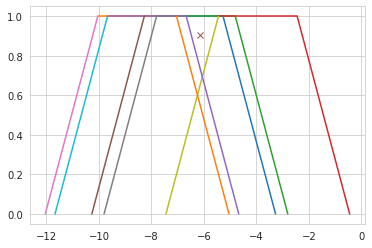

In [37]:
fig, axs = plt.subplots(1,1)
draw_trapmf(m1[:,1], m2[:,1], x=X[2,1], mu=mus[2], axs=axs)

  0%|          | 0/5 [00:00<?, ?it/s]

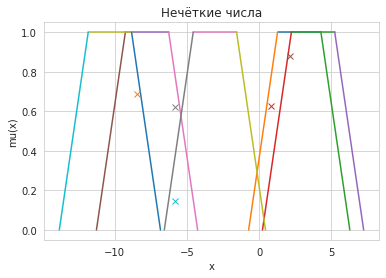

In [46]:
import random
someidx = random.sample(range(X.shape[0]), 5)
sns.set_style('whitegrid')
m1, m2, p = mu_func(mus[someidx], X[someidx])
fig, axs = plt.subplots(1,1,figsize=(6,4))
for ft, ax in zip(range(X.shape[1]-1), [axs]):
    ax.set(ylabel='mu(x)', xlabel='x')
    ax.set_title('Нечёткие числа')
    for x, mu, m1_, m2_ in zip(X[someidx,ft], mus[someidx],m1[:,ft],m2[:,ft]):
        draw_trapmf(m1_, m2_, ax, x=x, mu=mu)

  0%|          | 0/5 [00:00<?, ?it/s]

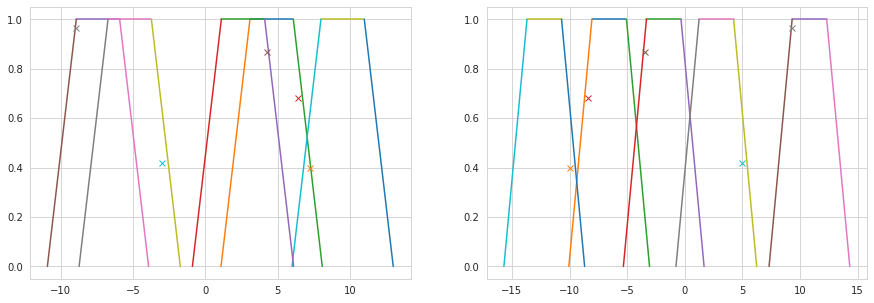

In [89]:
import random
someidx = random.sample(range(X.shape[0]), 5)
sns.set_style('whitegrid')
m1, m2, p = mu_func(mus[someidx], X[someidx])
fig, axs = plt.subplots(1,2,figsize=(15,5))
for ft, ax in zip(range(X.shape[1]), axs.reshape(-1)):
    for x, mu, m1_, m2_ in zip(X[someidx,ft], mus[someidx],m1[:,ft],m2[:,ft]):
        draw_trapmf(m1_, m2_, ax, x=x, mu=mu)

***Calculating distances***

In [93]:
from pynverse import inversefunc    # to get inverse function
inv = inversefunc((lambda x: x** 2))
inv(16)

array(4.)

In [94]:
from scipy.integrate import quad    # for integrating

In [114]:
quad(inversefunc(lambda x: 1-x),0,1)

(0.49999999999999994, 5.551115123125782e-15)

In [110]:
import numpy as np
from numpy.linalg import norm

def fuzzy_distance(x_1, x_2, lambda_=.5, ro_=.5, L=None, R=None):
    m1_1, m2_1, l_1, r_1 = x_1
    m1_2, m2_2, l_2, r_2 = x_2
    if lambda_ is None:
        if L != None:
            L_inv = inversefunc(L)
            lambda_ = quad(L_inv, 0, 1)[0]
        else:
            raise NameError('No information about L-side')
    if ro_ is None:
        if R != None:
            R_inv = inversefunc(R)
            ro_ = quad(R_inv, 0, 1)[0]
        else:
            raise NameError('No information about R-side')
            
    return np.sqrt(
        norm(m1_1 - m1_2) ** 2 + norm(m2_1 - m2_2) ** 2 + \
        norm((m1_1 - lambda_ * l_1) - (m1_2 - lambda_ * l_2)) ** 2 +\
        norm((m2_1 - ro_ * r_1) - (m2_2 - ro_ * r_2)) ** 2
    )

In [100]:
from scipy.spatial.distance import pdist

In [108]:
X_fuzzy = list(zip(m1, m2,np.full(X.shape[0], 2),np.full(X.shape[0], 2)))

In [98]:
fuzzy_distance((m1[0],m2[0],2,2), (m1[1],m2[1],2,2))

42.23377671748375

In [112]:
%%timeit
pdist(X_fuzzy, fuzzy_distance)

520 µs ± 21.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [113]:
pdist(X_fuzzy, fuzzy_distance)

array([42.23377672, 14.9369482 , 10.25939129, 27.03612967, 57.10152835,
       32.26680615, 16.73463787, 24.88448668, 41.9290475 , 18.13388446])

In [168]:
def fuzzify(X, mus, l=2, r=2, dc=3):
    m1, m2, p = mu_func(mus, X, l=l, r=r, dc=dc)
    X_fuzzy = np.array(list(zip(m1, m2, np.full(X.shape[0], l), np.full(X.shape[0], r))), dtype=object)
    return X_fuzzy

In [121]:
X_5, y_5 = make_blobs(n_features=5,centers=4)
mu_5 = np.random.uniform(0,1,X_5.shape[0])

In [169]:
X_5_fuzzy = fuzzify(X_5, mu_5)

  0%|          | 0/100 [00:00<?, ?it/s]

In [171]:
X_5_fuzzy[0]

array([array([  5.15848476, -10.15705944,  -1.5981618 ,  -5.10922108,
               -3.09761737])                                         ,
       array([ 8.15848476, -7.15705944,  1.4018382 , -2.10922108, -0.09761737]),
       2, 2], dtype=object)

In [141]:
%load_ext autoreload
%autoreload 2

In [143]:
from fuzzifier import Fuzzifier

In [146]:
fz = Fuzzifier(2,2,3)
fz.fuzzify(X[someidx],mus[someidx])

  0%|          | 0/5 [00:00<?, ?it/s]

[(array([  6.78566692, -11.76009363]),
  array([ 9.78566692, -8.76009363]),
  2,
  2),
 (array([-8.92376131,  9.30956024]), array([-5.92376131, 12.30956024]), 2, 2),
 (array([ 3.512333  , -9.20918049]), array([ 6.512333  , -6.20918049]), 2, 2),
 (array([ 4.38150001, -6.60413711]), array([ 7.38150001, -3.60413711]), 2, 2),
 (array([-2.31977408,  1.23497272]), array([0.68022592, 4.23497272]), 2, 2)]

***Find K-neighbors***

In [115]:
from sklearn.neighbors import NearestNeighbors

In [160]:
pdist(X_fuzzy, fuzzy_distance)

array([42.23377672, 14.9369482 , 10.25939129, 27.03612967, 57.10152835,
       32.26680615, 16.73463787, 24.88448668, 41.9290475 , 18.13388446])

In [172]:
from scipy.spatial.distance import squareform
X_dist = squareform(pdist(X_fuzzy, fuzzy_distance))

In [149]:
nn = NearestNeighbors(n_neighbors=2, metric='precomputed')
nn.fit(X_dist)

NearestNeighbors(metric='precomputed', n_neighbors=2)

In [136]:
X_dist

array([[ 0.        , 42.23377672, 14.9369482 , 10.25939129, 27.03612967],
       [42.23377672,  0.        , 57.10152835, 32.26680615, 16.73463787],
       [14.9369482 , 57.10152835,  0.        , 24.88448668, 41.9290475 ],
       [10.25939129, 32.26680615, 24.88448668,  0.        , 18.13388446],
       [27.03612967, 16.73463787, 41.9290475 , 18.13388446,  0.        ]])

In [150]:
nn.kneighbors(X_dist, return_distance=True)

(array([[ 0.        , 10.25939129],
        [ 0.        , 16.73463787],
        [ 0.        , 14.9369482 ],
        [ 0.        , 10.25939129],
        [ 0.        , 16.73463787]]), array([[0, 3],
        [1, 4],
        [2, 0],
        [3, 0],
        [4, 1]]))

In [137]:
distances, neighbors = nn.kneighbors(X_dist, return_distance=True)

In [138]:
distances[:,-1]

array([10.25939129, 16.73463787, 14.9369482 , 10.25939129, 16.73463787])

In [140]:
neighbors[:,1:]

array([[3],
       [4],
       [0],
       [0],
       [1]])

***Wishart on fuzzy data***

In [152]:
from Wishart_fuzzy import Wishart_fuzzy

In [154]:
wf = Wishart_fuzzy(3,0.2,2,2,5)

In [223]:
wf.fit(X, mus)

Fuzzifying...:   0%|          | 0/100 [00:00<?, ?it/s]

Calculating distances


100%|██████████| 100/100 [00:00<00:00, 28357.14it/s]

Distances calculated, 0.285539
Finding neighbors
Neighbors found, time 0.000982


In [225]:
#wf = Wishart_fuzzy(3,0.2,2,2,5)

wf.fit(X, np.ones(X.shape[0]), verbose=False)

Fuzzifying...:   0%|          | 0/100 [00:00<?, ?it/s]

Calculating distances
Distances calculated, 0.289075
Finding neighbors
Neighbors found, time 0.000979


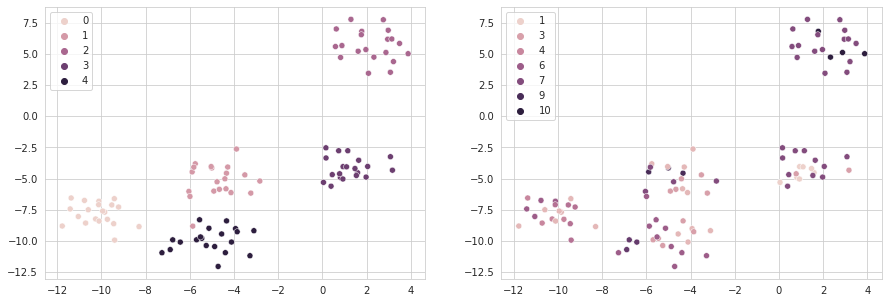

In [226]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, ax=axs[0])
sns.scatterplot(x=X[:,0], y=X[:,1], hue=wf.object_labels, ax=axs[1])
plt.show()